In [10]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.nn import functional
import pandas as pd

In [11]:
def ToNumpy(x):
    return x.cpu().detach().numpy()

In [12]:
x_np = np.random.normal(0,1,size=(10000,2))

data = torch.FloatTensor(x_np)

In [13]:
x_np

array([[-2.08064082, -0.4202064 ],
       [-0.16099834, -1.4684532 ],
       [ 1.09929488,  1.4690808 ],
       ...,
       [ 0.99120341,  1.63554016],
       [-1.07977273,  0.47794079],
       [-0.67472393, -0.95238015]])

In [14]:
linear = nn.Linear(2,1)
print(linear)
print('weight :', linear.weight.data)
print('bias :', linear.bias.data)

Linear(in_features=2, out_features=1, bias=True)
weight : tensor([[0.5398, 0.4045]])
bias : tensor([-0.4895])


In [15]:
y = linear(data)

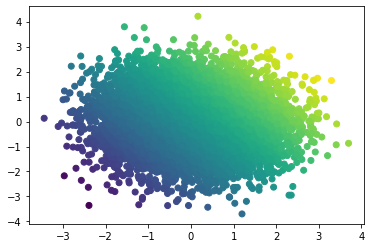

In [16]:
plt.scatter(x_np[:,0],x_np[:,1],c=ToNumpy(y))

In [17]:
features = 500
data = torch.FloatTensor(np.random.normal(0,1,size=(10000,features)))
y_target = torch.FloatTensor(np.random.normal(0,1,size=(10000,1))+1)

In [18]:
sequential_network = []
layers_num = 2

for i in range(layers_num):
    sequential_network.append(nn.Linear(features, features))
    sequential_network.append(nn.ReLU())
sequential_network.append(nn.Linear(features, 1))

In [19]:
model = nn.Sequential(*sequential_network)
model

Sequential(
  (0): Linear(in_features=500, out_features=500, bias=True)
  (1): ReLU()
  (2): Linear(in_features=500, out_features=500, bias=True)
  (3): ReLU()
  (4): Linear(in_features=500, out_features=1, bias=True)
)

In [20]:
y_pred = model(data)
y_pred

tensor([[ 0.1347],
        [ 0.0735],
        [ 0.0436],
        ...,
        [ 0.0063],
        [-0.0158],
        [ 0.0790]], grad_fn=<AddmmBackward>)

In [21]:
loss_func = nn.MSELoss()

In [22]:
def MSE(y_pred, y_target):
    return ((y_target - y_pred) ** 2).mean()

In [23]:
loss = loss_func(y_pred,y_target)

In [24]:
loss

tensor(1.9392, grad_fn=<MseLossBackward>)

In [25]:
class Layer(nn.Linear):
    def __init__(self, in_features, out_features, activation_function, bias = True):
        super().__init__(in_features, out_features, bias)
        self.activation_function = activation_function
        
    def forward(self,x):
        x = super().forward(x)
        x = self.activation_function(x)
        return x

In [26]:
def CreateModel(layers_num,features_num,activation_function):
    squential_network = []
    for i in range(layers_num):
        squential_network.append(Layer(features_num ,features_num, activation_function))
    squential_network.append(nn.Linear(features_num,1))
    return nn.Sequential(*squential_network)

In [27]:
def PlotGradients(model, layers_num):
    plt.rcParams['figure.figsize'] = [18, 4]
    for i,layer in enumerate(model):
        mean = layer.weight.grad.mean()
        std = layer.weight.grad.std()
        ax = plt.subplot(1,layers_num+1,i+1)
        ax.hist(ToNumpy(layer.weight.grad)[0])
        ax.set_title('layer nr '+str(i))
        ax.set_xlabel("\nmean {0:0.5f},\nstd {1:0.5f}".format(mean,std))


In [28]:
layers_num =5

In [29]:
model = CreateModel(layers_num,features,nn.Sigmoid())
y_pred = model(data)
loss = loss_func(y_pred,y_target)
loss.backward()

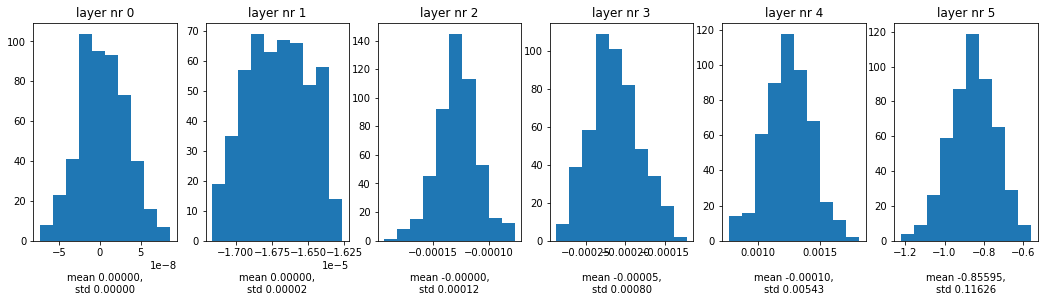

In [30]:
PlotGradients(model,layers_num)

In [31]:
def Experimant(activation_function):
    model = CreateModel(layers_num,features,activation_function)
    y_pred = model(data)
    loss = loss_func(y_pred,y_target)
    loss.backward()
    PlotGradients(model,layers_num)

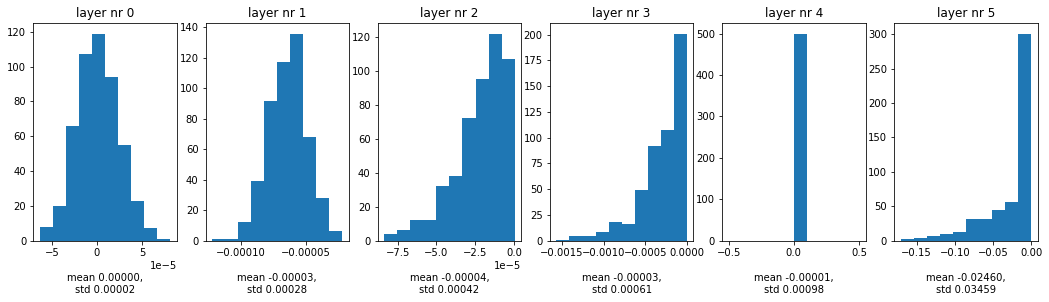

In [32]:
Experimant(nn.ReLU())

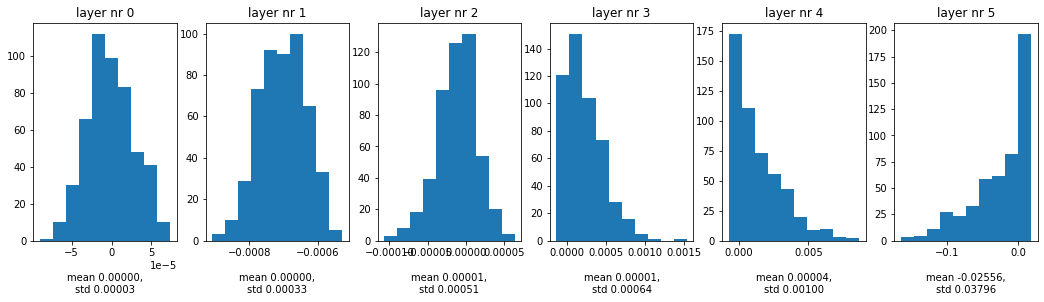

In [33]:
Experimant(nn.LeakyReLU(0.1))

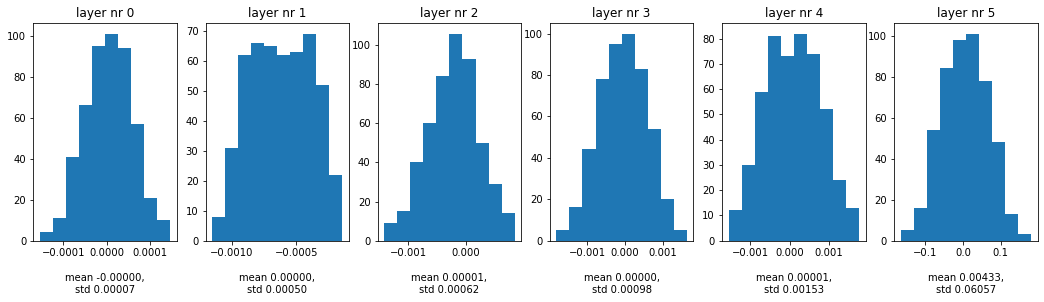

In [34]:
Experimant(nn.CELU())

In [35]:
def Mish(x):
    return x *(torch.tanh(functional.softplus(x)))

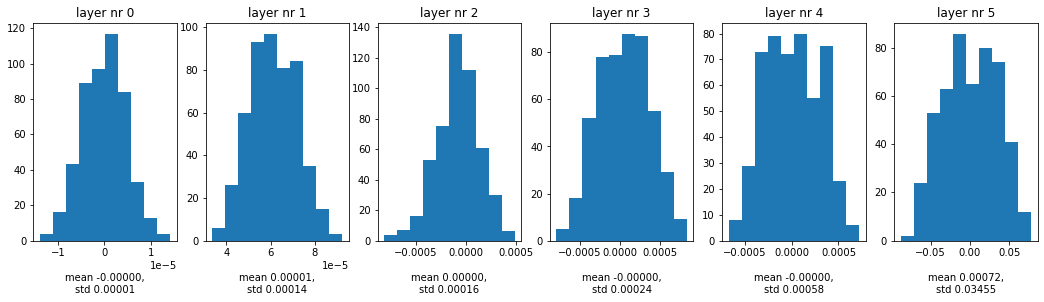

In [36]:
Experimant(Mish)

In [37]:
class Layer(nn.Linear):
    def __init__(self, in_features, out_features, activation_function, bias = True):
        super().__init__(in_features, out_features, bias)
        self.activation_function = activation_function
        
    def forward(self,x1):
        x = super().forward(x1)
        x = x1+self.activation_function(x)
        return x

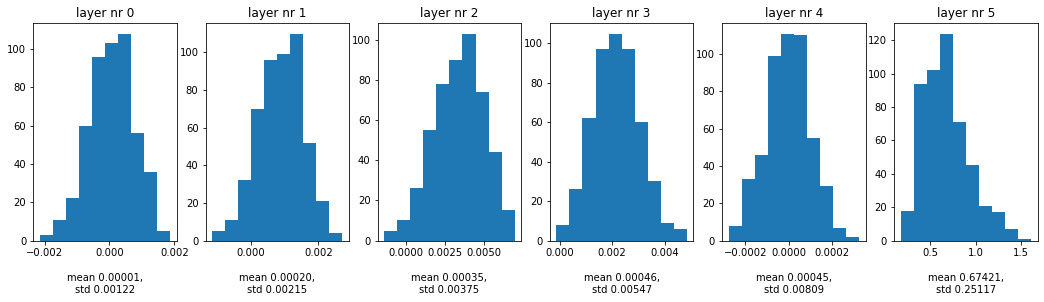

In [38]:
Experimant(nn.ReLU())